## Correlação e Modelos de Regressão

Este capítulo irá abordar o conceito de correlação das variáveis e a Regressão Linear e Polinomial. 

Realizando uma breve introdução de correlação, ela mostra o nível de relação entre as variáveis. Através do coeficiente de correlação (r) podemos identificar se a correlação é fraca, nula ou forte:

Correlação Positiva:
. 0<r<1: Correlação Fraca (gráfico ascendente com alguns pontos dispersos)
. r=0: Correlação Nula/Inexistente (gráfico com vários pontos dispersos)
. r=1: Correlação Perfeita (gráfico ascendente)

Correlação Negativa:
. -1<r<0: Correlação Fraca (gráfico descendente com alguns pontos dispersos)
. r=0 Correlação Nula/Inexistente (gráfico descendente com vários pontos dispersos)
. r=-1 Correlação Perfeita (gráfico descendente)

Vamos utilizar o mesmo dataset de abóboras do capítulo anterior. Para isto, iremos carregar as variáveis utilizadas anteriormente:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#Lendo o arquivo csv
aboboras= pd.read_csv(r"C:\Users\manus\OneDrive\Documentos\ML-For-Beginners\2-Regression\data\US-pumpkins.csv")

#Verificando o dataset
aboboras.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
#Filtrando somente 'bushel' da coluna 'Package'
aboboras=aboboras[aboboras['Package'].str.contains('bushel',case=True, regex=True)]

#Quantidade de células vazias por coluna
aboboras.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
#Filtrando as colunas que utilizaremos para análise
aboboras_filtrada=aboboras[['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']]

#Nova coluna com o mês baseada na coluna "Date"
mes=pd.DatetimeIndex(aboboras_filtrada['Date']).month

#Preço médio
import numpy as np
preco=(aboboras_filtrada['High Price']+aboboras_filtrada['Low Price'])/2

#Dia do ano
dia_do_ano=pd.to_datetime(aboboras_filtrada['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

#Normalizando o preço (preço por saca)
aboboras_filtrada.loc[aboboras_filtrada['Package'].str.contains('1 1/9'), 'Preco']=preco/(1+(1/9))

aboboras_filtrada.loc[aboboras_filtrada['Package'].str.contains('1/2'), 'Preco']=preco/(1/2)

#Adicionando as colunas no DataFrame:
aboboras_novo=pd.DataFrame(
    {'Mes': mes,
     'DiadoAno': dia_do_ano,
     'Variedade': aboboras_filtrada['Variety'],
     'Cidade': aboboras_filtrada['City Name'],
     'Pacote': aboboras_filtrada['Package'],
     'MenorPreco': aboboras_filtrada['Low Price'],
     'MaiorPreco': aboboras_filtrada['High Price'],
     'Preco': preco})

aboboras_novo.head()

C:\Users\manus\AppData\Local\Temp\ipykernel_9848\3074588900.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dia_do_ano=pd.to_datetime(aboboras_filtrada['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
C:\Users\manus\AppData\Local\Temp\ipykernel_9848\3074588900.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aboboras_filtrada.loc[aboboras_filtrada['Package'].str.contains('1 1/9'), 'Preco']=preco/(1+(1/9))


,Mes,DiadoAno,Variedade,Cidade,Pacote,MenorPreco,MaiorPreco,Preco
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,15.0


## Correlação
Vamos plotar o mesmo gráfico do capítulo anterior e verificar a correlação:

Text(0.5, 1.0, 'Investigação de Correlação')

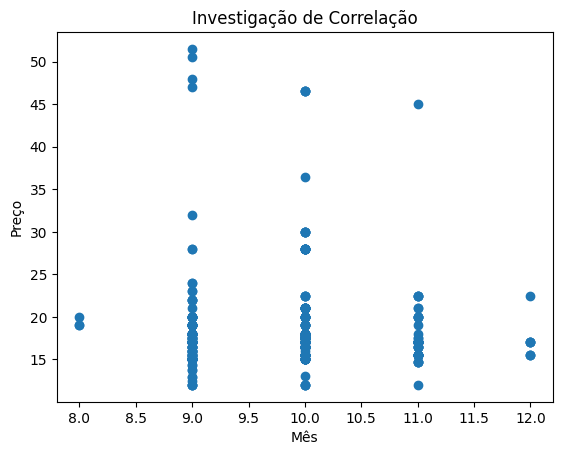

In [4]:
import matplotlib.pyplot as plt
plt.scatter('Mes','Preco',data=aboboras_novo)
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.title('Investigação de Correlação')

Observando apenas o gráfico, vemos que não há uma correlação visível. Agora vamos observar o coeficiente de correlação:

In [5]:
#Correlação entre Mês e Preço
print(aboboras_novo['Mes'].corr(aboboras_novo['Preco']))

-0.03498145913471124


Vemos que a correlação é fraca, bem próximo ao nulo. Então praticamente não há correlação.
Agora vamos observar a correlação entre dia do ano e preço:

Text(0.5, 1.0, 'Investigação de Correlação')

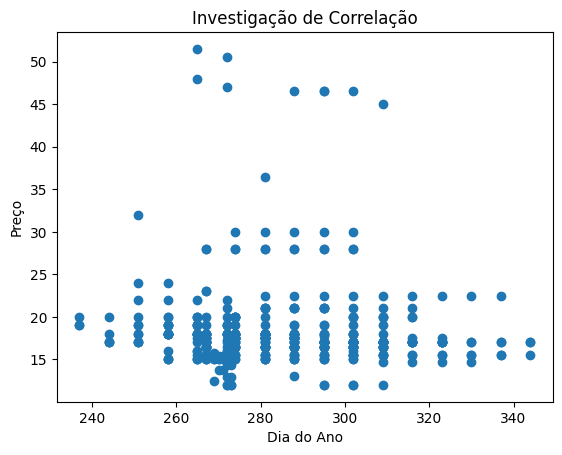

In [6]:

plt.scatter('DiadoAno','Preco',data=aboboras_novo)
plt.xlabel('Dia do Ano')
plt.ylabel('Preço')
plt.title('Investigação de Correlação')

In [7]:
#Correlação entre Dia do Ano e Preço
print(aboboras_novo['DiadoAno'].corr(aboboras_novo['Preco']))

-0.046669788989113885


A correlação é muito baixa, similar ao das variáveis mês e preço. Se observarmos bem, vemos que as variáveis Dia do Ano e Preço estão agrupadas. Mas e se separarmos elas por Variedades x Preço?

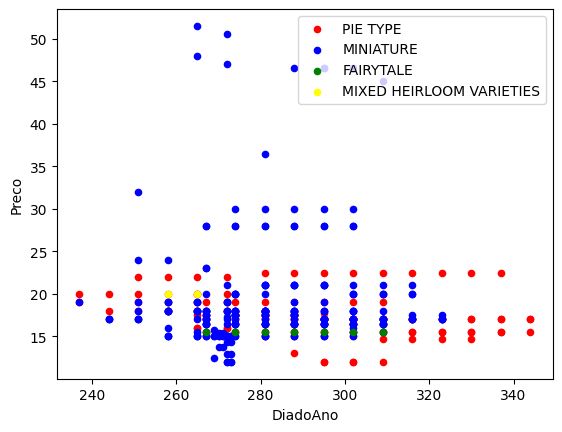

In [8]:
colors = ['red','blue','green','yellow']
ax=None
for i,var in enumerate(aboboras_novo['Variedade'].unique()): #pegou o índice (i) e o tipo (var) de abobora
    ax = aboboras_novo[aboboras_novo['Variedade']==var].plot.scatter('DiadoAno','Preco',ax=ax,c=colors[i],label=var)


Vemos que há um agrupamento por variedade. Então vamos ver o preço em relação ao dia do ano x preço, mas levando em consideração a variedade:

In [9]:
pie_type=aboboras_novo[aboboras_novo['Variedade']=='PIE TYPE']
miniature=aboboras_novo[aboboras_novo['Variedade']=='MINIATURE']
fairytale=aboboras_novo[aboboras_novo['Variedade']=='FAIRYTALE']
mixed=aboboras_novo[aboboras_novo['Variedade']=='MIXED HEIRLOOM VARIETIES']

#Correlação entre Variedade e Preço
print('PIE TYPE: ', pie_type['DiadoAno'].corr(pie_type['Preco']))
print('MINIATURE: ', miniature['DiadoAno'].corr(miniature['Preco']))
print('FAIRYTALE: ',fairytale['DiadoAno'].corr(fairytale['Preco']))
print('MIXED HEIRLOOM VARIETIES: ', mixed['DiadoAno'].corr(mixed['Preco']))

PIE TYPE:  -0.2593572010296743
MINIATURE:  0.050757870043505744
FAIRYTALE:  nan
MIXED HEIRLOOM VARIETIES:  nan


Logo, a melhor correlação que temos é a da torta de abóbora. Ela não é perfeita, mas é a melhor entre os 4 tipos de variedades e corresponde a uma correlação negativa e fraca.  Os tipos Fairtale e Mixed Heirloom Varieties possuem poucos dados para ser calculado a correlação.

E se utilizarmos as variáveis Dia do Ano x Preço para realizar predições a partir de um modelo de regressão? 
Vamos abordá-los utilizando somente o tipo PIE TYPE, pois ele possui melhor correlação.

# Regressão Linear

O modelo de regressão linear é expresso pela a equação de reta que estima a saída Y de acordo com a variável de entrada X.

Vamos relembrar os passos aprendidos no curso do Kaggle para construir e utilizar um modelo:

1. **Definir:**  Qual tipo de modelo iremos utilizar? *Linear e Polinomial*
2. **Ajustar (Fit):** Capturar padrões dos dados fornecidos
3. **Predizer (Predict):** Devemos predizer/prever.
4. **Validar (Evaluate):** Determinar a acurácia do modelo de predição

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Obtendo o X (Característica) e y (alvo de predição) para o modelo
X=pie_type['DiadoAno']
y=pie_type['Preco']

#Imprimindo o formato da variável
X.shape

(144,)

A variável X está com 2 dimensões (144,). Para transformá-la para 1 dimensão precisamos utilizar o reshape:

In [12]:
#Transformando de 2D -> 1D
X=X.to_numpy().reshape(-1,1)

#Imprimindo o formato da variável
X.shape

(144, 1)

Agora vamos seguir o passo a passo mencionado acima (Lembrando de separar os dados de treino e de teste):

In [13]:
#Separação em dados de treino e de validação/teste
treino_X, teste_X, treino_y, teste_y= train_test_split(X,y, test_size=0.2, random_state=0) 

#Definição do modelo
regressao_linear= LinearRegression()

#Ajuste do Modelo
regressao_linear.fit(treino_X, treino_y)

LinearRegression()

In [14]:
#Predição dos preços 
pred_regressao_linear=regressao_linear.predict(teste_X)

pred_regressao_linear

array([17.51947201, 17.98330917, 17.41124334, 16.76187131, 17.30301467,
       17.98330917, 17.51947201, 17.65862316, 17.8750805 , 17.194786  ,
       17.194786  , 17.08655733, 17.51947201, 16.97832865, 17.73592935,
       17.08655733, 16.97832865, 17.41124334, 17.08655733, 17.65862316,
       18.09153784, 17.51947201, 16.65364264, 17.51947201, 17.194786  ,
       17.73592935, 17.41124334, 17.194786  , 16.97832865])

In [15]:
#Validação do Modelo de Regressão Linear - Erro Médio Quadrático e Coeficiente de Determinação

#Erro Médio Quadrático
mse=np.sqrt(mean_squared_error(teste_y,pred_regressao_linear))

print(f'Erro Médio Quadrático: {mse:.2f} ({(mse/np.mean(pred_regressao_linear)*100):.2f} %)')

#Coeficiente de Determinação (Conhecido também como R²)
score= regressao_linear.score(treino_X, treino_y)
print(f'R^2: {score:.2f}')

Erro Médio Quadrático: 2.87 (16.50 %)
R^2: 0.04


Em relação ao Erro Médio Quadrático, quanto maior o erro, mais distante o nosso modelo está de prever o valor da torta de abóbora a cada dia do ano. Neste caso o MSE está alto. 

Já para para o R², quanto mais próximo de 1, melhor ajustado está nosso modelo dentro da regressão linear. Ele varia de 0 a 1, o que significa que nosso modelo não está nenhum pouco ajustado. Vamos plotar para visualizar:

Text(0.5, 1.0, 'Modelo de Regressão Linear')

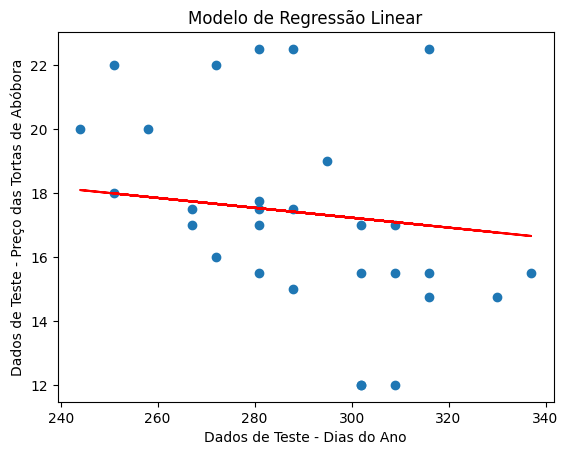

In [16]:
plt.scatter(teste_X, teste_y)
plt.plot(teste_X,pred_regressao_linear,color='red')
plt.xlabel('Dados de Teste - Dias do Ano')
plt.ylabel('Dados de Teste - Preço das Tortas de Abóbora')
plt.title('Modelo de Regressão Linear')

Agora vamos obter a equação da reta: 

In [17]:
#Equação da reta y = ax + b
print(f'y= {regressao_linear.coef_[0]}x + {regressao_linear.intercept_}')

y= -0.015461238747656512x + 21.86408009855789


Por fim, vamos prever o valor da torta de abóbora para o dia 256 do ano, mas tendo em mente que o modelo não possui boa acurácia:

In [18]:
regressao_linear.predict([[256]])

array([17.90600298])

Ao invés de utilizar um modelo linear, podemos verificar se o modelo polinomial se encaixa melhor na previsão do preço de abóboras para cada dia do ano.

# Modelo de Regressão Polinomial

O modelo de regressão polinomial se diferencia do modelo linear através de seus coeficientes. Enquanto a equação linear é de grau 1, na polinomial podemos ter desde 1 a até N coeficientes/graus. 

E no que isto implica? Ao aplicar um modelo polinomial, podemos ter uma curva que se encaixe melhor na nossa predição.

Para este modelo, utilizaremos o pipeline para criá-lo. O pipeline é uma sequência linear de módulos, onde a saída do primeiro é a entrada do próximo. Assim, ao utilizá-lo, minimizamos erros humanos e otimizamos o processo.

Na construção do nosso pipeline utilizando o sklearn, precisaremos dos parâmetros estimador, que irá estimar/transformar os dados. No nosso caso será o PolynomialFeatures, que geram características/features polinomiais. O segundo parâmetro é o que irá treinar o nosso modelo de regressão.

Vamos criar uma curva para ver se o modelo de regressão polinomial prediz melhor que o linear. Para isso, iremos utilizar Dias do Ano², pois assim teremos uma parábola devido a função de segundo grau. 

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Criando o nosso modelo de Regressão Polinomial de grau 2
modelo=make_pipeline(PolynomialFeatures(2),LinearRegression())

#Ajuste do modelo
modelo.fit(treino_X,treino_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Agora que criamos o nosso modelo e ajustamos ele, vamos predizer e validar: 

In [20]:
#Predizendo os dados
pred=modelo.predict(teste_X)

#Validação - Erro Médio Quadrático
mse=np.sqrt(mean_squared_error(teste_y,pred))
print(f'Erro Médio Quadrático: {mse:.2f} ({(mse/np.mean(pred)*100):.2f} %)')

#Coeficiente de Determinação (Conhecido também como R²)
score= modelo.score(treino_X, treino_y)
print(f'R^2: {score:.3f}')

Erro Médio Quadrático: 2.81 (16.20 %)
R^2: 0.089


O MSE ainda é alto, mas é melhor do que o modelo de regressão linear. E o R² não está bem ajustado. Agora vamos plotar nosso modelo:

Text(0.5, 1.0, 'Modelo de Regressão Polinomial')

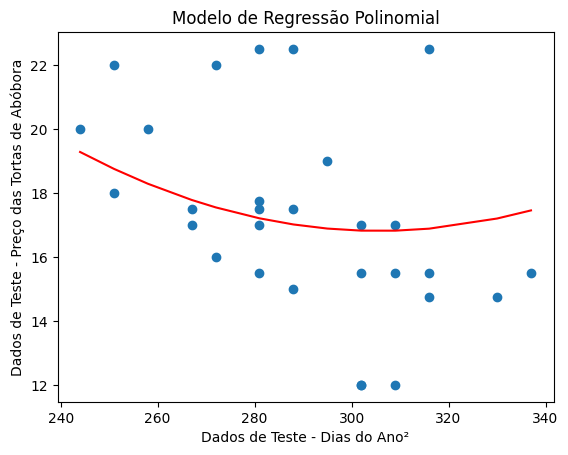

In [21]:
#Plotando o resultado do nosso modelo
plt.scatter(teste_X,teste_y)
plt.plot(sorted(teste_X), modelo.predict(sorted(teste_X)), color='red')
plt.xlabel('Dados de Teste - Dias do Ano²')
plt.ylabel('Dados de Teste - Preço das Tortas de Abóbora')
plt.title('Modelo de Regressão Polinomial')

Mesmo o modelo de regressão polinomial sendo melhor que o de regressão linear para este caso, ainda não foi o melhor modelo que se encaixe neste problema.

Outro ponto é que estamos utilizando apenas uma característica, que são os dias do ano. Se utilizarmos um conjunto de características, a predição será melhor.

# Características Categóricas

Relembrando os tipos de abóboras, temos no total 4 tipos: PIE TYPE, MINIATURE, FAIRYTALE e MIXED HEIRLOOM VARIETIES.
Vamos utilizar estas características agora. Porém ao invés de usar strings, podemos codificá-las para melhorar a predição de regressão linear, pois este modelo espera que as entradas sejam numéricas. Uma forma de fazer isto é através do **One-Hot Encoding**.

O One-Hot Encoding é útil quando temos variáveis categóricas - dados qualitativos, podendo ser nominais (ex.: tipo de abóbora, sexo, cor dos olhos)  ou ordinais (ex.: escolaridade). Para cada tipo de abóbora será atribuído 1 quando verdadeiro e 0 quando falso, criando uma coluna binária para cada tipo de abóbora. Deste modo, fugimos da ponderação arbitrária através das variáveis dummies/binárias.


In [22]:
#Utilizando o One-Hot Encoding para os tipos de abóboras
pd.get_dummies(aboboras_novo['Variedade'], dtype=int)

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


 Agora vamos treinar o nosso modelo de Regressão linear utilizando as características acima.

In [25]:
#Obtendo X e y 
X=pd.get_dummies(aboboras_novo['Variedade'], dtype=int)
y=aboboras_novo['Preco']

#Separação em dados de treino e de validação/teste
treino_X, teste_X, treino_y, teste_y= train_test_split(X,y, test_size=0.2, random_state=0) 

#Definição do modelo
regressao_linear= LinearRegression()

#Ajuste do Modelo
regressao_linear.fit(treino_X, treino_y)

#Predição dos preços 
pred_regressao_linear=regressao_linear.predict(teste_X)

#Validação do Modelo de Regressão Linear - Erro Médio Quadrático e Coeficiente de Determinação
#Erro Médio Quadrático
mse=np.sqrt(mean_squared_error(teste_y,pred_regressao_linear))
print(f'Erro Médio Quadrático: {mse:.2f} ({(mse/np.mean(pred_regressao_linear)*100):.2f} %)')

#Coeficiente de Determinação (Conhecido também como R²)
score= regressao_linear.score(treino_X, treino_y)
print(f'R^2: {score:.2f}')

Erro Médio Quadrático: 6.59 (36.15 %)
R^2: 0.02


Utilizando apenas uma característica de entrada, o nosso modelo continua com baixa precisão. Então vamos adicionar mais características relevantes, como Mês, Cidade e Pacote:

In [28]:
#Obtendo X e y 
X = pd.get_dummies(aboboras_novo['Variedade'], dtype=int) \
        .join(aboboras_novo['Mes']) \
        .join(pd.get_dummies(aboboras_novo['Cidade'], dtype=int)) \
        .join(pd.get_dummies(aboboras_novo['Pacote'], dtype=int))
y = aboboras_novo['Preco']

#Separação em dados de treino e de validação/teste
treino_X, teste_X, treino_y, teste_y= train_test_split(X,y, test_size=0.2, random_state=0) 

#Definição do modelo
regressao_linear= LinearRegression()

#Ajuste do Modelo
regressao_linear.fit(treino_X, treino_y)

#Predição dos preços 
pred_regressao_linear=regressao_linear.predict(teste_X)

#Validação do Modelo de Regressão Linear - Erro Médio Quadrático e Coeficiente de Determinação
#Erro Médio Quadrático
mse=np.sqrt(mean_squared_error(teste_y,pred_regressao_linear))
print(f'Erro Médio Quadrático: {mse:.2f} ({(mse/np.mean(pred_regressao_linear)*100):.2f} %)')

#Coeficiente de Determinação (Conhecido também como R²)
score= regressao_linear.score(treino_X, treino_y)
print(f'R^2: {score:.2f}')

Erro Médio Quadrático: 2.19 (11.29 %)
R^2: 0.89


O MSE caiu para 11,29 % e o R² subiu para 0,89. Temos como resultado uma predição melhor que as tentativas anteriores.

Agora vamos utilizar o modelo de regressão polinomial para verificarmos se conseguimos uma validação melhor.

In [29]:
#Obtendo X e y 
X = pd.get_dummies(aboboras_novo['Variedade'], dtype=int) \
        .join(aboboras_novo['Mes']) \
        .join(pd.get_dummies(aboboras_novo['Cidade'], dtype=int)) \
        .join(pd.get_dummies(aboboras_novo['Pacote'], dtype=int))
y = aboboras_novo['Preco']

#Separação em dados de treino e de validação/teste
treino_X, teste_X, treino_y, teste_y= train_test_split(X,y, test_size=0.2, random_state=0) 

#Criando o nosso modelo de Regressão Polinomial de grau 2
modelo=make_pipeline(PolynomialFeatures(2),LinearRegression())

#Ajuste do modelo
modelo.fit(treino_X,treino_y)

#Predizendo os dados
pred=modelo.predict(teste_X)

#Validação - Erro Médio Quadrático
mse=np.sqrt(mean_squared_error(teste_y,pred))
print(f'Erro Médio Quadrático: {mse:.2f} ({(mse/np.mean(pred)*100):.2f} %)')

#Coeficiente de Determinação (Conhecido também como R²)
score= modelo.score(treino_X, treino_y)
print(f'R^2: {score:.3f}')

Erro Médio Quadrático: 1.87 (9.58 %)
R^2: 0.934


Com a regressão polinomial MSE e R² foram melhores. Agora irei adicionar a validação de todos os modelos feitos neste notebook para fim de comparação:

| *Modelo*   | *Erro Médio Quadrático (MSE)*   | *Coeficiente de Determinação(R²)* | 
|-------|-------|-----------|
| Regressão Linear | 2.87 (16.50 %) | 0.040     |
| Regressão Polinomial  | 2.81 (16.20 %)  | 0.089     | 
| Regressão Linear (Somente com Variedade)  | 6.59 (36.15 %) | 0.020     | 
| Regressão Linear (Todas as Características)  | 2.19 (11.29 %)  | 0.890      | 
| Regressão Polinomial (Todas as Características) |  1.87 (9.58 %)  | 0.934      | 
